# Final Project - Deep Learning with PyTorch

This notebook is the final project of the course Deep Learing with PyTorch by [Aakash N S](https://jovian.ml/forum/u/aakashns/summary) which is hosted on [Jovian.ml](https://jovian.ml/forum/c/pytorch-zero-to-gans/18) and it's available for free on [freeCodeCamp.org](https://www.freecodecamp.org/), [YouTube](https://www.youtube.com/watch?v=vo_fUOk-IKk&list=PLWKjhJtqVAbm3T2Eq1_KgloC7ogdXxdRa) channel.


In this notebook the process of building a Convolutional Neural Network (CNN) [[1]](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a5) is discussed. 

The notebook is organized in the following order:

1. Introduction
2. Importing Modules and Exploring the Data
3. Training and Validation Datasets
4. Using the GPU
5. Defining the Models
6. Training the Models
7. Training Results
8. Making Preductions with the Treained Models
9. Commiting the Notebook
10. Future Work
11. Conclussions
12. References

For the porpuses of demostration, this notebook uses the Fruits-360 Dataset [[2]](https://arxiv.org/abs/1712.00580), which is available at [Kaggle](https://www.kaggle.com/moltean/fruits).

In here, two different techniques of using CNN would be discussed, a custom made architecture and a pretarined architecture.



## 1. Introduction

As humans, we love to classify things, anything that you can come up with can be classified into a category or class. In the industry it is a daily problem, classification of parts, fixtures, assemblies, and goods is part of the daily basis. This is the reason why humans have come out with techniques such as Machine Learning (ML) [[1]](https://www.technologyreview.com/2018/11/17/103781/what-is-machine-learning-we-drew-you-another-flowchart/), Neural Networks (NN) [[2]](http://news.mit.edu/2017/explained-neural-networks-deep-learning-0414), Deep Learning (DL) [[3]](https://vinodsblog.com/2018/10/15/everything-you-need-to-know-about-convolutional-neural-networks/), among other algorithms to automate the process of classification.

In this piece, (1) the concept of Convolutional Neural Networks (CNN) is discussed. (2) Two different CNN architectures are presented written in PyTorch [[4]](https://pytorch.org/docs/stable/index.html) based code, where the first one is a custom made architecture proposed by the author, and the second one is a standard architecture so-called "ResNet" [[5]](https://arxiv.org/abs/1512.03385). (3) The results in terms of accuracy are discussed.

The main objective of this notebook is to illustrate how to build a CNN model for image detection and categortization. For the purposes of this work, a custom CNN is implemented and then compared with a ResNet CNN.

**What are Convolutional Neural Networks?**

Convolutional Neural Networks or Deep Learning architectures were developed form the inspiration of the human brain and how it process information. CNN are a type of Neural Network that provides good results in areas such as image processing, image recognition and image classification. This is the reason why, based on the title of this piece, a CNN model is required.

Deep learning applications are widely used in the industry. Some applications of CNN include Artificial Intelligence (AI) systems such as robots, virtual assistants, autonomous vehicles, among many others.
Since the purpose of this piece is to analyze image classification, the "Fruits 360 Dataset" [[6]](https://arxiv.org/abs/1712.00580) would be used. This dataset is available at Kaggle and it contains images of fruits and vegetables, where the main properties are:


* Total number of images: 90483.
* Training set size: 67692 images (one fruit or vegetable per image).
* Test set size: 22688 images (one fruit or vegetable per image).
* Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)
* Number of classes: 131 (fruits and vegetables).
* Image size: 100x100 pixels.

## 2. Importing Modules and Exploring the Data

#### 2.1. Importing the Data from Kaggle to Google Colab

If you are running this notebook on [Google Colab](https://colab.research.google.com/), please refer to this [post](https://www.kaggle.com/vijayabhaskar96/google-colab-helper-notebook) to be able to download the dataset.

Once you followed the intructions of the post and got your username and key, copy and paste them into the following block of code in `username = " "` and `key = " "`, respectibly.

In [ ]:
# Write down your kaggle username and key:
username = " "
key = " "

!pip install git+https://github.com/Kaggle/kaggle-api.git --upgrade
import os
credentials = {"username":username,"key":key}
os.environ['KAGGLE_USERNAME']=credentials["username"]
os.environ['KAGGLE_KEY']=credentials["key"]
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip

### 2.2. Importing the Modules

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import torchvision.models as models

The dataset is extracted to the directory `fruits-360`. It contains 4 folders. For the porpuses of this work, we will be focused on the `Test` and `Trining` folders. 

Each of them contains 131 folders, one for each class of images. 

***If you are running this in Kaggle, follow the next steps to start:***

1. Click on the "toggle side bar"
2. Click on the bottom "+ Add data"
3. Search for the dataset called "fruits 360"
4. Select the dataset by "Mihai Oltean" and click the bottom "add", this will add the dataset to the environment under the directory "input"
5. Under the "Settings" section, turn on the "Internet"
6. If possible, make sure that the GPU accelerator is selected.
7. Run the following block of code to proceed

In [2]:
# Load the directory paths to the dataset
DATA_DIR = '../input/fruits/fruits-360'
TRAIN_DIR = DATA_DIR + '/Training'
TEST_DIR = DATA_DIR + '/Test'

***If you are running this in Google Colab, run the following block:***

In [ ]:
# Load the directory paths to the dataset
DATA_DIR = '../content/fruits-360'
TRAIN_DIR = DATA_DIR + '/Training'
TEST_DIR = DATA_DIR + '/Test'

### 2.3. Exploring the Data

Let's verify that the directories have the same number of classes

In [3]:
# Look at the root directory
print('The folders inside the root directory are: ')
print(os.listdir(DATA_DIR))

# The classes are the name of the folders inside the Training directory
train_classes = os.listdir(TRAIN_DIR)
print('\nThe classes on the Training directory are: ')
print(train_classes)
print('The Training directory has %s classes.' %len(train_classes))

# The classes are the name of the folders inside the Test directory
test_classes = os.listdir(TEST_DIR)
print('\nThe classes on the Test directory are: ')
print(test_classes)
print('The Training directory has %s classes. \n' %len(test_classes))

The folders inside the root directory are: 
['Test', 'papers', 'LICENSE', 'test-multiple_fruits', 'Training', 'readme.md']

The classes on the Training directory are: 
['Grapefruit Pink', 'Apple Crimson Snow', 'Potato Red Washed', 'Pineapple', 'Cherry Wax Red', 'Fig', 'Peach Flat', 'Raspberry', 'Maracuja', 'Plum 2', 'Cactus fruit', 'Cherry 2', 'Mandarine', 'Grape White', 'Corn Husk', 'Grape Blue', 'Quince', 'Cucumber Ripe', 'Pear Kaiser', 'Cherry Wax Yellow', 'Avocado ripe', 'Grape White 2', 'Grapefruit White', 'Watermelon', 'Pepino', 'Onion Red Peeled', 'Apple Red Delicious', 'Salak', 'Mango Red', 'Apple Pink Lady', 'Physalis with Husk', 'Pineapple Mini', 'Pear Red', 'Nectarine Flat', 'Onion Red', 'Tamarillo', 'Peach', 'Tomato Yellow', 'Potato Sweet', 'Banana Red', 'Beetroot', 'Apple Red 2', 'Nut Pecan', 'Cauliflower', 'Apple Golden 1', 'Onion White', 'Tomato 2', 'Physalis', 'Grape White 4', 'Nut Forest', 'Redcurrant', 'Apple Red Yellow 1', 'Dates', 'Cocos', 'Tomato 3', 'Apple Granny 

Let's verifry how many images the `Apple Red 2` class has on the Training and Test directories, respectibly.

In [4]:
print('\nThe images inside the /Training/Apple Red 2 directory are:')
print(os.listdir(TRAIN_DIR + '/Apple Red 2'))
print('\nThe /Training/Apple Red 2 directory has %s images.' %len(os.listdir(TRAIN_DIR + '/Apple Red 2')))


The images inside the /Training/Apple Red 2 directory are:
['15_100.jpg', 'r_165_100.jpg', '284_100.jpg', '206_100.jpg', '11_100.jpg', 'r_249_100.jpg', '169_100.jpg', 'r_230_100.jpg', '280_100.jpg', '214_100.jpg', 'r_31_100.jpg', '183_100.jpg', '297_100.jpg', 'r_12_100.jpg', 'r_149_100.jpg', '249_100.jpg', 'r_291_100.jpg', 'r_274_100.jpg', 'r_315_100.jpg', 'r_185_100.jpg', 'r_294_100.jpg', '286_100.jpg', '312_100.jpg', 'r_153_100.jpg', '293_100.jpg', '197_100.jpg', '282_100.jpg', 'r_278_100.jpg', 'r_202_100.jpg', '290_100.jpg', 'r_250_100.jpg', 'r_125_100.jpg', '110_100.jpg', 'r_171_100.jpg', 'r_259_100.jpg', '148_100.jpg', '267_100.jpg', 'r_175_100.jpg', 'r_106_100.jpg', 'r_146_100.jpg', '230_100.jpg', '116_100.jpg', '279_100.jpg', 'r_221_100.jpg', 'r_184_100.jpg', '122_100.jpg', 'r_223_100.jpg', '301_100.jpg', 'r_280_100.jpg', '216_100.jpg', '178_100.jpg', '143_100.jpg', 'r_318_100.jpg', 'r_124_100.jpg', '227_100.jpg', '198_100.jpg', 'r_128_100.jpg', '120_100.jpg', 'r_23_100.jpg', '

In [5]:
print('\nThe images inside the /Test/Apple Red 2 directory are:')
print(os.listdir(TEST_DIR + '/Apple Red 2'))
print('\nThe /Test/Apple Red 2 directory has %s images.' %len(os.listdir(TEST_DIR + '/Apple Red 2')))


The images inside the /Test/Apple Red 2 directory are:
['r_59_100.jpg', '34_100.jpg', 'r_68_100.jpg', 'r_83_100.jpg', 'r_75_100.jpg', '57_100.jpg', 'r_93_100.jpg', 'r_85_100.jpg', '36_100.jpg', '58_100.jpg', 'r_80_100.jpg', '33_100.jpg', '64_100.jpg', 'r_77_100.jpg', '82_100.jpg', '51_100.jpg', '40_100.jpg', '324_100.jpg', '50_100.jpg', '3_100.jpg', 'r_96_100.jpg', 'r_78_100.jpg', '321_100.jpg', 'r_97_100.jpg', 'r_324_100.jpg', 'r_62_100.jpg', '8_100.jpg', 'r_67_100.jpg', '326_100.jpg', 'r_6_100.jpg', '90_100.jpg', 'r_63_100.jpg', 'r_90_100.jpg', '73_100.jpg', '325_100.jpg', 'r_321_100.jpg', 'r_34_100.jpg', 'r_99_100.jpg', 'r_79_100.jpg', 'r_36_100.jpg', '68_100.jpg', '92_100.jpg', '52_100.jpg', 'r_4_100.jpg', 'r_325_100.jpg', 'r_84_100.jpg', 'r_95_100.jpg', '84_100.jpg', 'r_44_100.jpg', 'r_58_100.jpg', '44_100.jpg', '55_100.jpg', '45_100.jpg', '66_100.jpg', '4_100.jpg', 'r_82_100.jpg', '95_100.jpg', 'r_51_100.jpg', 'r_41_100.jpg', '32_100.jpg', 'r_86_100.jpg', 'r_322_100.jpg', 'r_49_

Now that you have verified that both directories, `Trianing` and `Test`, have the same classes it is possible to proceed to load them as Tensors

## 3. Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set**: used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set**: used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set**: used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

For the purposes of this notebook, all the images included in the Trining directory would be used as Trining Dataset, and the same will be for the Test directory as Validation Dataset. The Test set would the Validation Dataset.

### 3.1. Data Transformations

"Randomized Data Augmentations" will be applyed randomly chosen transformations while loading images from the training dataset. Specifically, each image will be pad by 10 pixels, then flip the image horizontally with a 50% probability. Finally a random rotation of 20 degress will be applied. Since the transformation will be applied randomly and dynamically each time a particular image is loaded, the model sees slightly different images in each epoch of training, which allows it generalize better.

In [5]:
train_tfms = tt.Compose([tt.RandomCrop(100, padding=10, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(),
                         tt.RandomRotation(20),
                         tt.ToTensor()
                         ])
valid_tfms = tt.Compose([tt.ToTensor()])

After the data augmentations are set, it is possible to use the `ImageFolder` module provided by PyTorch to load the datasets as Tensors

In [6]:
train_ds = ImageFolder(TRAIN_DIR, train_tfms)
valid_ds = ImageFolder(TEST_DIR, valid_tfms)

Now that the data is loaded as tensors, `train_ds` and `valid_ds` for the Trining and Test datasets respectibly, it is possible to explore the data.

Let's define a function for that:

In [7]:
def show_example_train(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    print('Image size: ', img.size())

def show_example_test(img, label):
    print('Label: ', valid_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
    print('Image size: ', img.size())

Label:  Apple Braeburn (0)
Image size:  torch.Size([3, 100, 100])


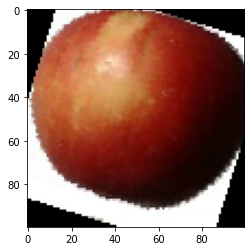

In [8]:
show_example_train(*train_ds[0])

Label:  Cantaloupe 1 (22)
Image size:  torch.Size([3, 100, 100])


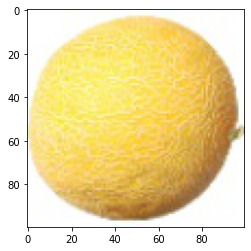

In [9]:
show_example_test(*valid_ds[3695])

Notice that the training sample have the data augmentations applied, meanwhile the validation sample does not have them. 

### 3.2. DataLoaders

Now that the data is loaded and transformed it is almost ready for training, but first you will have to define what is called as data loaders. 

Usually, while you are running machine learning models you will work with large amount of data. That data will have to be processed by a computer, and computers have limited resources. It would be impossible for a machine to run all the 67692 images included in this dataset at once. For this reason you will need data loaders. 

Fortunately, PyTorch comes with its own module for that and all what you have to do is to define a dataset, which you already defined in the previous section, and a batch size.

The batch size is the amount of data that will be process at each time. If you set a large batch you might run out of memory, so try to set a reasonable number depending for your data. For this time those two batches will have the same size, but you can change those numbers if you feel like.

Since for the purposes of this work, two different CNN architectures will be discussed and compared, it will be necessary to define two different batches:

In [10]:
batch_size_custom = 32      # Batch size for custom CNN model
batch_size_resnet = 32     # Batch size for resnet CNN model
random_seed = 42
torch.manual_seed(random_seed);

Not it is possible to use the `DataLoader` module from PyTorch to load the datasets as:

* `train_dl_custom` and `valid_dl_custom` for the custom CNN model, and
* `train_dl_resnet` and `valid_dl_resnet` for the resnet  CNN model, respictibly.

In [11]:
# DataLoaders for Custom CNN Model
train_dl_custom = DataLoader(train_ds, batch_size_custom, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_custom = DataLoader(valid_ds, batch_size_custom*2, num_workers=3, pin_memory=True)

In [12]:
# DataLoaders for ResNet CNN Model
train_dl_resnet = DataLoader(train_ds, batch_size_resnet, shuffle=True, num_workers=3, pin_memory=True)
valid_dl_resnet = DataLoader(valid_ds, batch_size_resnet*2, num_workers=3, pin_memory=True)

Notice that `shuffle=True` was selected for the training dataloader, so that the batches generated in each epoch are different, and this randomization helps generalize & speed up the training process. 

On the other hand, since the validation dataloader is used only for evaluating the model, there is no need to shuffle the images.

Let's take a look at some sample images from the training dataloader.

In [13]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

train_dl_custom dataloader samples: 


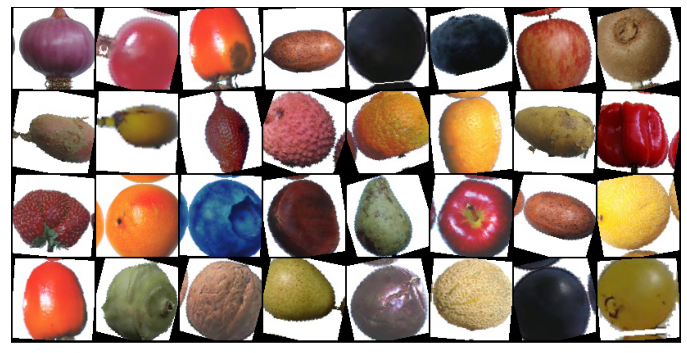

In [14]:
print('train_dl_custom dataloader samples: ')
show_batch(train_dl_custom)

valid_dl_custom dataloader samples: 


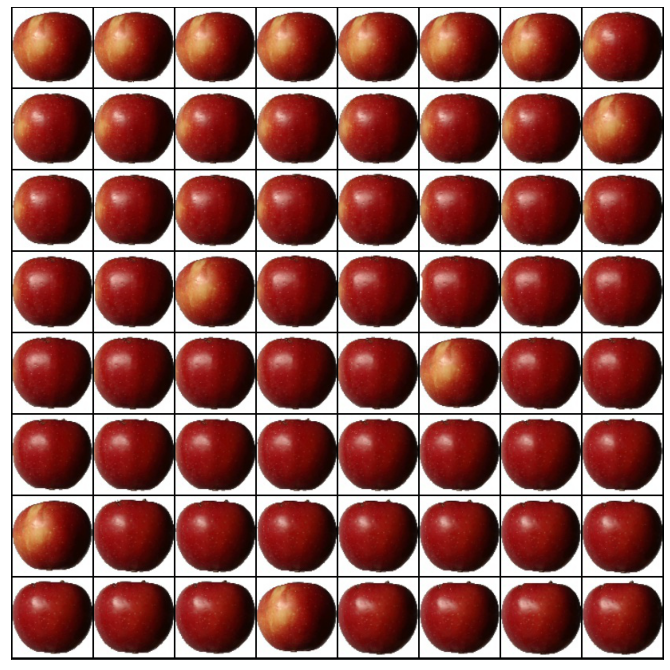

In [15]:
print('valid_dl_custom dataloader samples: ')
show_batch(valid_dl_custom)

train_dl_resnet dataloader samples: 


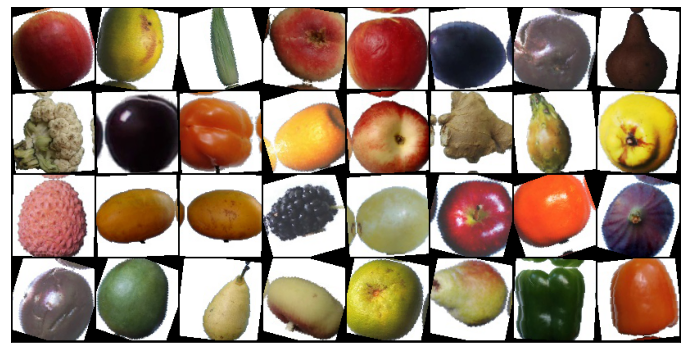

In [16]:
print('train_dl_resnet dataloader samples: ')
show_batch(train_dl_resnet)

valid_dl_resnet dataloader samples: 


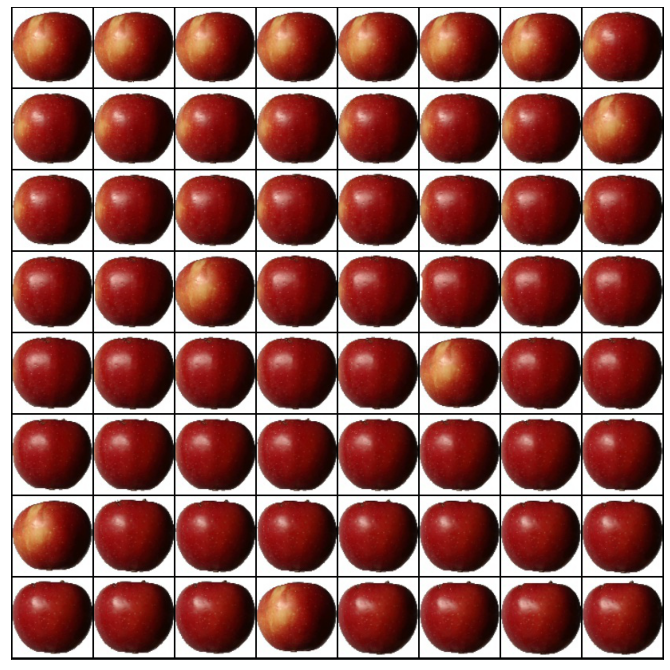

In [17]:
print('valid_dl_resnet dataloader samples: ')
show_batch(valid_dl_resnet)

Notice how the `train_dl` samples have the data augmentations applied.

## 4. Using the GPU

As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time. GPUs contain hundreds of cores that are optimized for performing expensive matrix operations on floating point numbers in a short time, which makes them ideal for training deep neural networks with many layers. 

You can use GPUs for free on [Kaggle kernels](https://www.kaggle.com/kernels) or [Google Colab](https://colab.research.google.com/), or rent GPU-powered machines on services like Google Cloud Platform, Amazon Web Services or Paperspace.

You can check if a GPU is available and the required [NVIDIA CUDA](https://developer.nvidia.com/cuda-zone) drivers are installed using `torch.cuda.is_available`.

In [18]:
torch.cuda.is_available()

True

If a GPU is available, you can define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move the models and data to the GPU as required.

The `DeviceDataLoader` class used to wrap the existing data loaders and move data to the selected device, as a batches are accessed. Interestingly, you will not need to extend an existing class to create a PyTorch dataloader. All that is needed is an `__iter__` method to retrieve batches of data, and an `__len__` method to get the number of batches.

In [19]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [20]:
device = get_default_device()
device

device(type='cuda')

Now, you can wrap the training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [21]:
# Device Data Loader for Custom CNN Model
train_dl_custom = DeviceDataLoader(train_dl_custom, device)
valid_dl_custom = DeviceDataLoader(valid_dl_custom, device)

In [22]:
# Device Data Loader for Custom CNN Model
train_dl_resnet = DeviceDataLoader(train_dl_resnet, device)
valid_dl_resnet = DeviceDataLoader(valid_dl_resnet, device)

## 5. Defining the Model

# *Convolutional Neural Networks (CNN)*

As aforementioned, this work implements CNN which a class of artificial NN which uses convolutional layers to filter data for learning purposes. This involves combining input data (feature map) with a convolution kernel (filter) to form a transformed map.

The main components of a CNN are the input layer, hidden layers (this could go from 1 to the ones needed by the application) and the output layer.

The main difference between a CNN and a regular Neural Network is that the CNN layers are arranged in three dimensions (width, height, and depth). 

The hidden layers are a combination of convolution, pooling, normalization, and fully connected layers [[7]](https://developer.nvidia.com/discover/convolutional-neural-network).


In other words, a CNN is a Deep Learning algorithm with the capability to use images as input, inspect them in various ways to detect patterns or objects, to get as output the ability to differentiate one from another. 

For the porpuses of this work, a custom CNN is implemented and then compared with a ResNet CNN.

Before getting into details in each model let us define an `ImageClassificationBase` class and an `accuracy` funtion for the models.

* The `accuracy` function will work as a way to evaluate how well the model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly i.e. the accuracy of the predictions. 

* The `ImageClassification` class will work as trainer, validation and loss calculator for both models.

In [23]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                      
        loss = F.cross_entropy(out, labels)                   # Calculate training loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                                    # Generate predictions
        loss = F.cross_entropy(out, labels)                   # Calculate validation loss
        acc = accuracy(out, labels)                           # Calculate accuracy
        return {'val_loss': loss.detach(),  'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()         # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()            # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.10f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

### 5.1. Custom CNN Model

The architecture consider for this custom CNN model will be based on *Residual Blocks* and *Batch Normalization*. This is for the porpuses of being able to actually compare the results of the custom CNN with the ResNet model.

*   *Residual Block* adds the original input back to the output feature map, which was obtained by passing the input through one or more convolutional layers [[8]](https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec)

![](https://d2l.ai/_images/residual-block.svg) 

Difference between a regular block (left) and a residual block (right), ([source](https://d2l.ai/chapter_convolutional-modern/resnet.html)).


*   *Batch Normalization*, as its name suggests, normalizes the inputs of the convolutional layers by bringing them to the same scale. This reduces the time of training of the neural network [[9]](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd)



In [24]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels),     # Batch Normalization
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class CustomCNN(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 128)                                 # 3 x 64 x 64 
        self.conv2 = conv_block(128, 256, pool=True)                              # 128 x 32 x 32 
        self.res1 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))     # 256 x 32 x 32
        
        self.conv3 = conv_block(256, 512, pool=True)                              # 512 x 16 x 16
        self.conv4 = conv_block(512, 1024, pool=True)                             # 1024 x 8 x 8
        self.res2 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024)) # 1024 x 8 x 8

        self.conv5 = conv_block(1024, 2048, pool=True)                            # 256 x 8 x 8
        self.conv6 = conv_block(2048, 4096, pool=True)                            # 512 x 4 x 4
        self.res3 = nn.Sequential(conv_block(4096, 4096), conv_block(4096, 4096)) # 512 x 4 x 4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),                          # 9216 x 1 x 1
                                        nn.Flatten(),                             # 9216
                                        nn.Linear(9216, num_classes))             # 131
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out    # Residual Block 
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out    # Residual Block
        out = self.classifier(out)
        return out

        # remove the + out to see the differences of adding the output at the end

### 5.2. ResNet CNN Model

*ResNet* stands for residual neural networks, which are pre-trained models in in the ImageNet dataset [[5]](https://arxiv.org/abs/1512.03385)

![alt text](https://d2l.ai/_images/ResNetFull.svg)

Diagram of the full ResNet-18, [source](https://d2l.ai/chapter_convolutional-modern/resnet.html).

PyTorch offers implementations of 5 versions of resnet, which contains 5, 34, 50, 101, 152 layers respectibly [[10]](https://pytorch.org/hub/pytorch_vision_resnet/). 

For the porpuses of this work a resnet34 will be used in its `pretrained` version, where the last layer will be modified to fit the dataset used.

In [25]:
class ResNetCNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=True)     # You can change the resnet model here
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 131)          # Output classes
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

## 6. Training the Models

Before training the models, let us define a `fit_one_cicle` function, which will perform the entire training process. This function records the validation loss and metric from each epoch and returns a history of the training process. This is useful for debuggin & visualizing the training process. 

Configurations like batch size, maximum learning rate etc. need to picked in advance while training machine learning models, and are called ***hyperparameters***. 

Picking the right hyperparameters is critical for training an accurate model within a reasonable amount of time, and is an active area of research and experimentation. Feel free to try different learning rates and see how it affects the training process.

* **Learning rate scheduling**: Instead of using a fixed learning rate, the model will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one use in this work is the so-called "*One Cycle Learning Rate Policy*", which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs [[11]](https://sgugger.github.io/the-1cycle-policy.html).

* **Weight decay**: This is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function [[12]](https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab).

* **Gradient clipping**: This technique is helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. [[13]](https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48).

Also, it is time to define other two useful functions: `evaluate` and `get_lr`:

* The `evaluate` function will evaluate the training model every epoch. This will provide as output how well or how bad the training model is doing.

* The `get_lr` or "get learning rate", will optimize the learning rate every epoch.

In [26]:
@torch.no_grad()
def evaluate(model, val_loader):
    print('Evaluating Model ...')
    model.eval()
    outputs = [model.validation_step(batch) for batch in tqdm(val_loader)]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        print('\nTraining Model ...')
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Now, it is time to define the hyperparameters for the training process.

Notice that the trainer optimizer selected was the ***Adam optimizer***, which uses techniques like momentum and adaptive learning rates for faster training [[14]].(https://ruder.io/optimizing-gradient-descent/index.html).

In [27]:
epochs = 10
max_lr = 1e-3
grad_clip = 1e-1
weight_decay = 1e-4
opt_func = torch.optim.Adam

### 6.1. Training the Custom CNN Model

At this point everything is ready for the training of the custom model, except for one little detail. 

The custom model was build based on the desired input (3 image channels) and an specific output (the classes of the fruits on the images). 

It is necessary to specify that the input of the model is `3` *channels* and the output are `131` classes of fruits.

Once those two parameters are specified, it is just a matter of load them into the CNN model and afterwards move the model to the device (`cpu` or `cuda` GPU) previiously selected. 

In [28]:
input_channels = 3
output_classes = 131 

custom_model = to_device(CustomCNN(input_channels, output_classes), device)
custom_model

CustomCNN(
  (conv1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpla

Now that the model is loaded and in the desired device, let us check that the input and output data are correct.

In [29]:
for images, labels in train_dl_custom:
    print('images.shape:', images.shape)
    out = custom_model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 100, 100])
out.shape: torch.Size([32, 131])
out[0]: tensor([ 0.1298,  0.0619, -0.5083, -0.2206, -1.0352, -0.6216, -1.9680, -0.6332,
         0.5817,  0.4015,  0.2273,  1.8232,  1.5796, -2.4791, -3.1565, -0.0208,
         1.1833,  0.9652, -0.4535,  0.2036,  1.7790, -0.4843, -0.0830, -1.0882,
        -1.1069, -2.0577, -1.3439, -0.3942, -1.7252,  0.1926, -1.6087, -0.0485,
        -0.6194,  1.1388, -0.0941,  0.9921,  1.0549,  0.7317, -2.8756, -1.1382,
         2.7089,  2.3287, -0.3053, -0.4093, -0.3918,  1.5607,  0.4788,  2.1513,
         1.3660,  0.6702,  0.5842, -0.8263, -0.9557, -0.2016, -0.2315, -0.7644,
         1.0669, -1.3155, -0.1307,  0.4516, -0.6606, -0.7744,  1.0692,  1.2253,
         0.3752,  0.2283,  0.4415, -1.9180,  0.2103, -1.0791, -0.0545, -0.3972,
         0.9373,  0.8408, -0.0044, -0.9161, -1.5075, -0.7060, -0.7254, -1.1751,
         1.6940,  0.9430,  0.3501, -1.3827,  1.1739, -1.1659, -1.4220, -1.4189,
         0.5496,  1.3182,  0.4559, 

As it is shown in the previous block, the `images.shape` of the input data loader is:

* 32 = batch size 
* 3 = image channels (RGB)
* 100 x 100 = image size (width, height)

In other hand, the output of the CNN model shows:

* 32 = bratch size
* 131 = number of fruit classes

Let's evaluate the model

In [30]:
history_CustomCNN = [evaluate(custom_model, valid_dl_custom)]
history_CustomCNN

Evaluating Model ...


[{'val_loss': 4.875039100646973, 'val_acc': 0.01725352182984352}]

Now, you can run the following block to perform the training of the custom CNN model.

*NOTE: Take into consideration that the process of training might take several minutes*.

In [32]:
%%time
history_CustomCNN += fit_one_cycle(epochs, max_lr, custom_model, train_dl_custom, valid_dl_custom, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...



Evaluating Model ...



Epoch [0], last_lr: 0.0002798628, train_loss: 0.6825, val_loss: 0.7308, val_acc: 0.8806

Training Model ...



Evaluating Model ...



Epoch [1], last_lr: 0.0007599314, train_loss: 0.3768, val_loss: 0.1071, val_acc: 0.9746

Training Model ...



Evaluating Model ...



Epoch [2], last_lr: 0.0010000000, train_loss: 0.1101, val_loss: 0.1159, val_acc: 0.9763

Training Model ...



Evaluating Model ...



Epoch [3], last_lr: 0.0009504846, train_loss: 0.1208, val_loss: 0.6231, val_acc: 0.8956

Training Model ...



Evaluating Model ...



Epoch [4], last_lr: 0.0008117457, train_loss: 0.0882, val_loss: 0.0889, val_acc: 0.9816

Training Model ...



Evaluating Model ...



Epoch [5], last_lr: 0.0006112620, train_loss: 0.0457, val_loss: 0.0897, val_acc: 0.9824

Training Model ...



Evaluating Model ...



Epoch [6], last_lr: 0.0003887420, train_loss: 0.0238, val_loss: 0.0695, val_acc: 0.9863

Training Model ...



Evaluating Model ...



Epoch [7], last_lr: 0.0001882583, train_loss: 0.0098, val_loss: 0.0694, val_acc: 0.9893

Training Model ...



Evaluating Model ...



Epoch [8], last_lr: 0.0000495194, train_loss: 0.0021, val_loss: 0.0609, val_acc: 0.9901

Training Model ...



Evaluating Model ...



Epoch [9], last_lr: 0.0000000040, train_loss: 0.0013, val_loss: 0.0465, val_acc: 0.9921
CPU times: user 44min 39s, sys: 31min 53s, total: 1h 16min 32s
Wall time: 1h 19min 4s


### 6.2. Training the ResNet CNN Model

At this point everything is ready for the training of the ResNet CNN model.

In a similar fashion than the custom CNN model, it is just a matter of load them into the CNN model and afterwards move the model to the device (cpu or cuda GPU) previiously selected.


In [33]:
resnet_model = to_device(ResNetCNN(), device)
resnet_model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


ResNetCNN(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

Now, let us evluate the model and see how it performs.

In [34]:
history_ResNetCNN = [evaluate(resnet_model, valid_dl_resnet)]
history_ResNetCNN

Evaluating Model ...


[{'val_loss': 4.8911919593811035, 'val_acc': 0.012588027864694595}]

First, freeze the ResNet layers and train some epochs. This only trains the final layer to start classifying the images.

In [35]:
resnet_model.freeze()

Train the final leyer for a few epochs.

In [38]:
%%time
history_ResNetCNN += fit_one_cycle(5, 1e-2, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...



Evaluating Model ...



Epoch [0], last_lr: 0.0075986279, train_loss: 4.0341, val_loss: 4.1749, val_acc: 0.1345

Training Model ...



Evaluating Model ...



Epoch [1], last_lr: 0.0095048463, train_loss: 4.0265, val_loss: 4.0410, val_acc: 0.2963

Training Model ...



Evaluating Model ...



Epoch [2], last_lr: 0.0061126202, train_loss: 3.9844, val_loss: 4.0229, val_acc: 0.4335

Training Model ...



Evaluating Model ...



Epoch [3], last_lr: 0.0018825835, train_loss: 3.9483, val_loss: 3.9348, val_acc: 0.8170

Training Model ...



Evaluating Model ...



Epoch [4], last_lr: 0.0000000400, train_loss: 3.9234, val_loss: 3.9195, val_acc: 0.8961
CPU times: user 10min 18s, sys: 27.6 s, total: 10min 46s
Wall time: 14min 2s


Now, unfreeze and train some more.

In [39]:
resnet_model.unfreeze()

In [41]:
%%time
history_ResNetCNN += fit_one_cycle(5, 1e-3, resnet_model, train_dl_resnet, valid_dl_resnet, 
                                  grad_clip=grad_clip, 
                                  weight_decay=weight_decay, 
                                  opt_func=opt_func)


Training Model ...



Evaluating Model ...



Epoch [0], last_lr: 0.0007598628, train_loss: 3.9195, val_loss: 3.9229, val_acc: 0.8728

Training Model ...



Evaluating Model ...



Epoch [1], last_lr: 0.0009504846, train_loss: 3.9222, val_loss: 3.9264, val_acc: 0.8581

Training Model ...



Evaluating Model ...



Epoch [2], last_lr: 0.0006112620, train_loss: 3.9185, val_loss: 3.9245, val_acc: 0.8624

Training Model ...



Evaluating Model ...



Epoch [3], last_lr: 0.0001882583, train_loss: 3.9135, val_loss: 3.9128, val_acc: 0.9148

Training Model ...



Evaluating Model ...



Epoch [4], last_lr: 0.0000000040, train_loss: 3.9102, val_loss: 3.9111, val_acc: 0.9245
CPU times: user 9min 56s, sys: 27 s, total: 10min 23s
Wall time: 13min 38s


## 7. Training Results

After 1 hour and almost 20 minutes you will have the final result of the training which should look something similar to this:

* Last Learning Rate: 4e-9
* Training Loss: 0.0013
* Validation Loss: 0.0465
* Validation Accuracy: 99.21%

In other hand, after ~30 minutes, you will have the final result of the training which should look something similar to this:

* Last Learning Rate: 4e-9
* Training Loss: 3.9102
* Validation Loss: 3.9111
* Validation Accuracy: 92.45%

In order to visualize the results for both models, let us define some helper functions:

* The `plot_accuracies` function will plot the evolution of the accuracy along the training epochs.
* The `plot_losses` function plots the training and validation losses of the models vs the epochs of training.
* The `plot_lrs` function shows the changes of the learning rate over the trianing epochs.

In [72]:
def plot_accuracies(history, model_name):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(model_name + ' - Accuracy vs. No. of epochs');

def plot_losses(history, model_name):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title(model_name + ' - Loss vs. No. of epochs');

def plot_lrs(history, model_name):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title(model_name + ' - Learning Rate vs. Batch no.');

### 7.1. Training Results for Custom CNN Model

Run the following blocks to get the ploted results


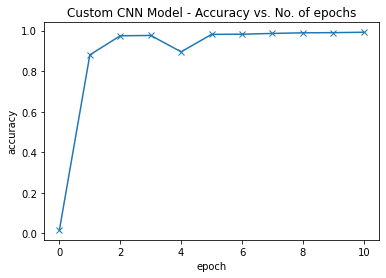

In [73]:
plot_accuracies(history_CustomCNN, 'Custom CNN Model')

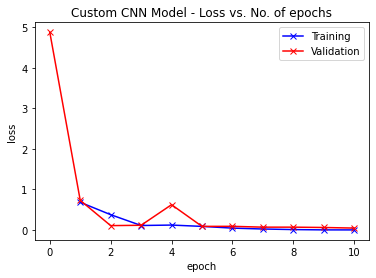

In [74]:
plot_losses(history_CustomCNN, 'Custom CNN Model')

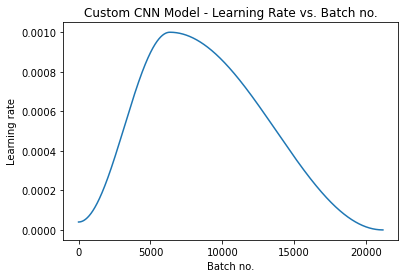

In [75]:
plot_lrs(history_CustomCNN, 'Custom CNN Model')

### 7.2. Training Results for ResNet CNN Model

Run the following blocks to get the ploted results

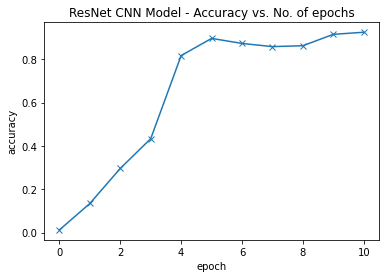

In [76]:
plot_accuracies(history_ResNetCNN, 'ResNet CNN Model')

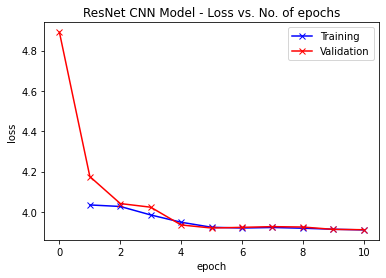

In [77]:
plot_losses(history_ResNetCNN, 'ResNet CNN Model')

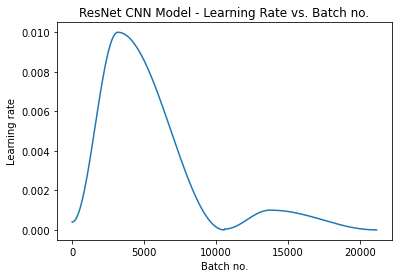

In [78]:
plot_lrs(history_ResNetCNN, 'ResNet CNN Model')

## 8. Making Predictions with the Training Models

Now you can used the trained models to make predictions with the validation dataset. Since both of the modeles achieved over 90% of accuracy the predictions will be similar.

Let us define a helper `predict_image` function to plot the predictions.

This is the prediction of the custom model:

In [56]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return valid_ds.classes[preds[0].item()]

### 8.1. Predictions Custom CNN Model

You just need to run the following blocks of code and if you like, chage the index of `valid_ds` to see different results.

Label: Avocado ripe , Predicted: Avocado ripe


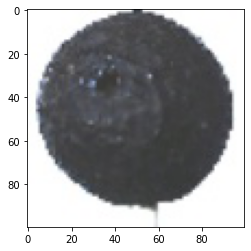

In [57]:
img, label = valid_ds[2569]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, custom_model))

Label: Kumquats , Predicted: Kumquats


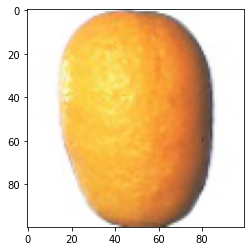

In [58]:
img, label = valid_ds[9856]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, custom_model))

### 8.2. Predictions ResNet CNN Model

You just need to run the following blocks of code and if you like, chage the index of `valid_ds` to see different results.

Label: Avocado ripe , Predicted: Avocado ripe


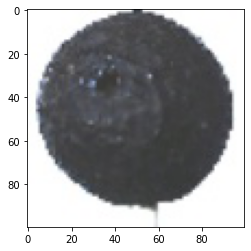

In [59]:
img, label = valid_ds[2569]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, resnet_model))

Label: Kumquats , Predicted: Kumquats


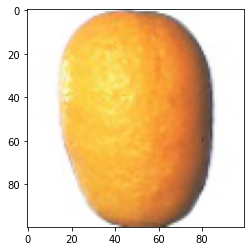

In [60]:
img, label = valid_ds[9856]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, resnet_model))

## 9. Save the Models and Commit the Notebook

In order to save your work you will just have to run the following blocks. Feel free to rename both of the models. 

In [64]:
torch.save(custom_model.state_dict(), 'fruits-360-custom.pth')
torch.save(resnet_model.state_dict(), 'fruits-360-resnet.pth')

Now you will just need a name for your project. Install the Jovian module and commit to Jovian.ml.

You will need a Jovian accound and introduce your API key to be able to commit.

In [1]:
project_name = 'Final Project - Deep Learning with PyTorch'
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project=project_name,  
              outputs=['./fruits-360-custom.pth', './fruits-360-resnet.pth'],
              environment=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/fabianac07/Final Project - Deep Learning with PyTorch


<IPython.core.display.Javascript object>

## 10. Future Work

Even when the results are good, there are still areas of opportunity that need attention:

* Reduce the Training and Validation Losses with the ResNet Model.
* Reduce the time needed for training of the Custom Model.
* Test the Custom Model with a different dataset to evaluate its performance.

## 11. Conclusions

In this piece two different Convolutional Neural Network (CNN) architectures for image classification purposes were presented. A Custom Model proposed by the author and a ResNet Model included on the PyTroch module.

A Jupyter Notebook with the complete code is available for further modifications that the reader would desire to do in the following link.

The results showed that the Custom Model, even when it took longer amount of time for training, showed better results than the ResNet Model implemented in the PyTorch module.

The **Custom Model** achieved a **99.21%** of accuracy, meanwhile the **ResNet Model** only reached **92.45%**.

The Custom Model managed to reduce the training and validation losses in comparison to the ResNet Model. 
A Jupyter Notebook with the complete code is available for further modifications that the reader would desire to do in the following link.

## 12. References

[1] Hao, K, *"What is machine learning?"*, 2018. [Online]. Available: https://www.technologyreview.com/2018/11/17/103781/what-is-machine-learning-we-drew-you-another-flowchart/. [Accessed 22 June 2020].

[2] Hadesty, L., *"Explained: Neural networks"*, 2017. [Online]. Available: http://news.mit.edu/2017/explained-neural-networks-deep-learning-0414. [Accessed 22 June 2020].

[3] Sharma, V. *"Deep Learning - Introduction to Convolutional Neural Networks"*, 15 October 2018. [Online]. Available: https://vinodsblog.com/2018/10/15/everything-you-need-to-know-about-convolutional-neural-networks/. [Accessed 22 June 2020].

[4] PyTorch Contributors, *"PyTorch Documentation"*, 2019. [Online]. Available: https://pytorch.org/docs/stable/index.html. [Accessed 22 June 2020].

[5] He, K., et. al., *"Deep Residual Learning for Image Recognition"*, 2015. [Online]. Available: https://arxiv.org/abs/1512.03385.[Accessed 15 April 2020].

[6] Muresan, H., Oltean, M. *"Fruit recognition from images using deep learning"*, 2018, in Acta Univ. Sapientiae, Informatica. Vol. 10, №1, pp. 26–42. [online] Available: https://arxiv.org/abs/1712.00580.

[7] NVIDIA Coorporation. *"Convolutional Neural Network (CNN)"*, 2020. [online] NVIDIA DEVELOPER. Available: https://developer.nvidia.com/discover/convolutional-neural-network,  [Accessed 22 June 2020].

[8] Sahoo, S. *"Residual blocks - Building blocks of ResNet"*, 2018. [online] Towards Data Science. Available: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec, [Accessed 22 June 2020].

[9] Kumar, N. *"Batch Normalization and Dropout in Neural Networks with Pytorch"*, 2019. [online] Towards Data Science. Available: https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd, [Accessed 22 June 2020].

[10] PyTorch Documentation. *"RESNET"*. [online] Available: https://pytorch.org/hub/pytorch_vision_resnet/, [Accessed 22 June 2020].

[11] Gugger, S. *"The 1cycle polici"*, 2018. [online] Available: https://sgugger.github.io/the-1cycle-policy.html, [Accessed 22 June 2020].

[12] Vasani, D., "This thing called Weight Decay"*, 2019. [online] Towards Data Science. Available: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab, [Accessed 22 June 2020].

[13] Wong, W., *"What is Gradient Clipping?"*, 2019. [online] Towards Data Science. Available: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48, [Accessed 22 June 2020].

[14] Ruder, S., *"An overview of gradient descent optimization algorithms"*, 2016. [online] Sebastian Ruder, Available at: https://ruder.io/optimizing-gradient-descent/index.html, [Accessed 22 June 2020].
